# data preprocessing

In [6]:
import tensorflow as tf

In [7]:
import splitfolders
splitfolders.ratio('D:/COMPUTER VISION DATASETS/MNIST Digit Classification/trainingSet/trainingSet',
                   output="preprocess_data", seed=1337, ratio=(.7, 0.2,0.1)) 



Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  1.63 files/s]
Copying files: 4 files [00:00,  2.26 files/s]
Copying files: 9 files [00:00,  3.17 files/s]
Copying files: 18 files [00:00,  4.45 files/s]
Copying files: 24 files [00:01,  6.14 files/s]
Copying files: 37 files [00:01,  8.58 files/s]
Copying files: 44 files [00:01, 11.55 files/s]
Copying files: 53 files [00:01, 15.63 files/s]
Copying files: 61 files [00:01, 19.65 files/s]
Copying files: 72 files [00:01, 26.02 files/s]
Copying files: 82 files [00:01, 33.32 files/s]
Copying files: 96 files [00:01, 42.67 files/s]
Copying files: 106 files [00:02, 48.82 files/s]
Copying files: 115 files [00:02, 54.83 files/s]
Copying files: 126 files [00:02, 63.15 files/s]
Copying files: 135 files [00:02, 69.02 files/s]
Copying files: 144 files [00:02, 68.78 files/s]
Copying files: 153 files [00:02, 70.73 files/s]
Copying files: 164 files [00:02, 78.79 files/s]
Copying files: 173 files [00:02, 81.54 files/s]
Copying file

# Creating ANN Architecture

In [152]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Flatten())
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64,  activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [157]:
'''
1st layers

28*28+1 = 785
785*784 = 615440

2nd layers
((28*28)+1)*512 = 401920 parameters

'''

'\n1st layers\n\n28*28+1 = 785\n785*784 = 615440\n\n2nd layers\n((28*28)+1)*512 = 401920 parameters\n\n'

# compiling step

In [158]:
network.compile(optimizer="rmsprop",
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])

# Load data

In [159]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [160]:
train_generator = train_datagen.flow_from_directory(
     'preprocess_data/train',
     target_size=(28 , 28),batch_size=64, color_mode= 'grayscale')



Found 29394 images belonging to 10 classes.


In [161]:
validation_generator = train_datagen.flow_from_directory(
    'preprocess_data/val',
     target_size=(28, 28),batch_size=64, color_mode= 'grayscale')


Found 8396 images belonging to 10 classes.


In [162]:
test_generator = train_datagen.flow_from_directory(
     'preprocess_data/test',
     target_size=(28, 28),batch_size=64, color_mode= 'grayscale')


Found 4210 images belonging to 10 classes.


In [168]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [163]:
history = network.fit(
 train_generator,epochs=5,
 validation_data=validation_generator)

Epoch 1/5
460/460 [==============================] - 35s 74ms/step - loss: 0.3435 - accuracy: 0.8942 - val_loss: 0.1887 - val_accuracy: 0.9480
Epoch 2/5
460/460 [==============================] - 36s 78ms/step - loss: 0.1407 - accuracy: 0.9591 - val_loss: 0.1819 - val_accuracy: 0.9551
Epoch 3/5
460/460 [==============================] - 32s 69ms/step - loss: 0.0997 - accuracy: 0.9730 - val_loss: 0.1586 - val_accuracy: 0.9653
Epoch 4/5
460/460 [==============================] - 32s 69ms/step - loss: 0.0776 - accuracy: 0.9786 - val_loss: 0.1426 - val_accuracy: 0.9712
Epoch 5/5
460/460 [==============================] - 32s 70ms/step - loss: 0.0648 - accuracy: 0.9836 - val_loss: 0.1934 - val_accuracy: 0.9669


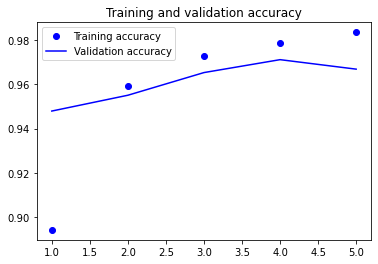

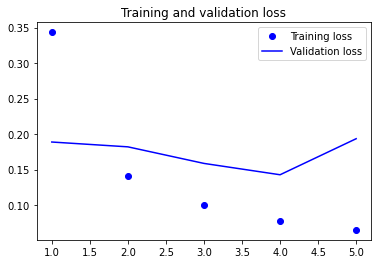

In [164]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [165]:
network.evaluate(test_generator)

66/66 [==============================] - 4s 54ms/step - loss: 0.1503 - accuracy: 0.9679


[0.15032416582107544, 0.9679334759712219]

In [170]:
network.save('mnist model.h5')

In [171]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [175]:
img = image.load_img("preprocess_data/test/9/img_10720.jpg", target_size=(28,28), color_mode= 'grayscale')
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = network.predict(resized_img_np)

In [176]:
print(prediction)

[[4.74997360e-05 4.36815839e-07 8.32905243e-06 4.28203712e-05
  2.05599261e-03 4.43987628e-05 7.44989393e-07 9.71633301e-04
  1.01615246e-04 9.96726513e-01]]


In [224]:
print(prediction.argmax())
prediction[0][9]

9


0.9967265

In [181]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [182]:
import tensorflow as tf
import keras
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
9
    
[[4.74997360e-05 4.36815839e-07 8.32905243e-06 4.28203712e-05
  2.05599261e-03 4.43987628e-05 7.44989393e-07 9.71633301e-04
  1.01615246e-04 9.96726513e-01]]
9


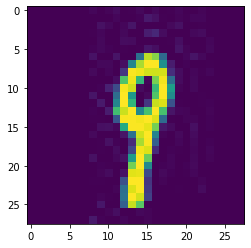

In [218]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("preprocess_data/test/9/img_18855.jpg",
                            target_size=(28,28),color_mode= 'grayscale')

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = network.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = '7'
elif result[0][8] == 1:
    prediction = '8'
elif result[0][9] == 1:
    prediction = '9'
else:
    prediction = 'Sorry'
    
print(prediction)


#########################################

print('    ')
  
    
    
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img("preprocess_data/test/9/img_10720.jpg", target_size=(28,28), color_mode= 'grayscale')
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = network.predict(resized_img_np)
print(prediction)



print(prediction.argmax())

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8
    
[[2.5240179e-09 1.0468065e-09 7.4699571e-09 3.8909573e-07 9.3770014e-10
  4.3358136e-06 5.6564172e-08 6.4935203e-11 9.9999523e-01 2.1425892e-08]]


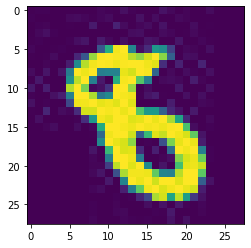

In [213]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("preprocess_data/test/8/img_10942.jpg",
                            target_size=(28,28),color_mode= 'grayscale')

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = network.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = '7'
elif result[0][8] == 1:
    prediction = '8'
elif result[0][9] == 1:
    prediction = '9'
else:
    prediction = 'Sorry'
    
print(prediction)





#########################################

print('    ')
  
    
    
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img("preprocess_data/test/8/img_10942.jpg", target_size=(28,28), color_mode= 'grayscale')
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = network.predict(resized_img_np)
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
7


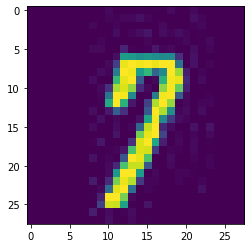

In [203]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("preprocess_data/test/7/img_1088.jpg",
                            target_size=(28,28),color_mode= 'grayscale')

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = network.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = '7'
elif result[0][8] == 1:
    prediction = '8'
elif result[0][9] == 1:
    prediction = '9'
else:
    prediction = 'Sorry'
    
print(prediction)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
6


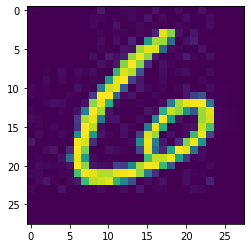

In [204]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("preprocess_data/test/6/img_1084.jpg",
                            target_size=(28,28),color_mode= 'grayscale')

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = network.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = '7'
elif result[0][8] == 1:
    prediction = '8'
elif result[0][9] == 1:
    prediction = '9'
else:
    prediction = 'Sorry'
    
print(prediction)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
5


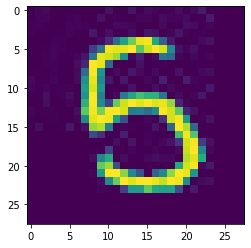

In [205]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("preprocess_data/test/5/img_107.jpg",
                            target_size=(28,28),color_mode= 'grayscale')

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = network.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = '7'
elif result[0][8] == 1:
    prediction = '8'
elif result[0][9] == 1:
    prediction = '9'
else:
    prediction = 'Sorry'
    
print(prediction)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
4


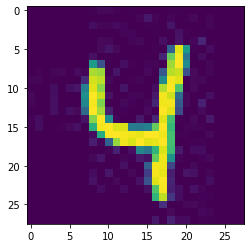

In [206]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("preprocess_data/test/4/img_10479.jpg",
                            target_size=(28,28),color_mode= 'grayscale')

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = network.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = '7'
elif result[0][8] == 1:
    prediction = '8'
elif result[0][9] == 1:
    prediction = '9'
else:
    prediction = 'Sorry'
    
print(prediction)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
3


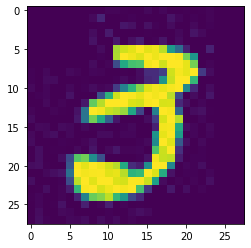

In [207]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("preprocess_data/test/3/img_20827.jpg",
                            target_size=(28,28),color_mode= 'grayscale')

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = network.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = '7'
elif result[0][8] == 1:
    prediction = '8'
elif result[0][9] == 1:
    prediction = '9'
else:
    prediction = 'Sorry'
    
print(prediction)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
2


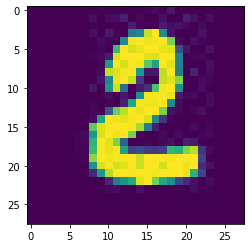

In [208]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("preprocess_data/test/2/img_10577.jpg",
                            target_size=(28,28),color_mode= 'grayscale')

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = network.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = '7'
elif result[0][8] == 1:
    prediction = '8'
elif result[0][9] == 1:
    prediction = '9'
else:
    prediction = 'Sorry'
    
print(prediction)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1


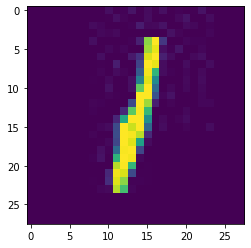

In [209]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("preprocess_data/test/1/img_18359.jpg",
                            target_size=(28,28),color_mode= 'grayscale')

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = network.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = '7'
elif result[0][8] == 1:
    prediction = '8'
elif result[0][9] == 1:
    prediction = '9'
else:
    prediction = 'Sorry'
    
print(prediction)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


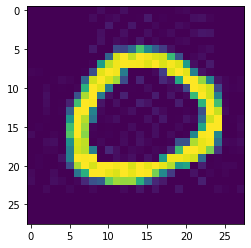

In [210]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("preprocess_data/test/0/img_10616.jpg",
                            target_size=(28,28),color_mode= 'grayscale')

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = network.predict(test_image)
print(result)

if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = '7'
elif result[0][8] == 1:
    prediction = '8'
elif result[0][9] == 1:
    prediction = '9'
else:
    prediction = 'Sorry'
    
print(prediction)